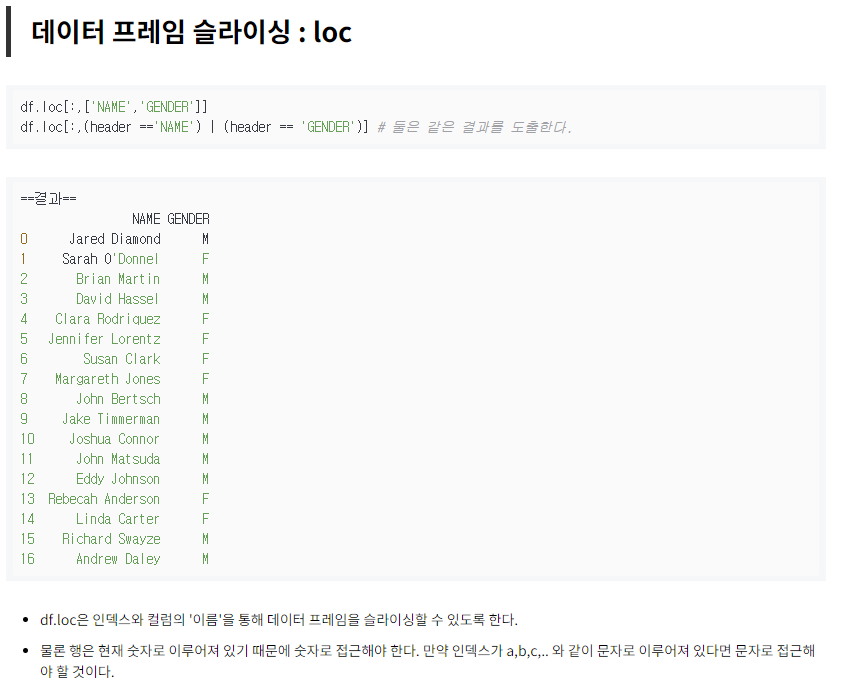

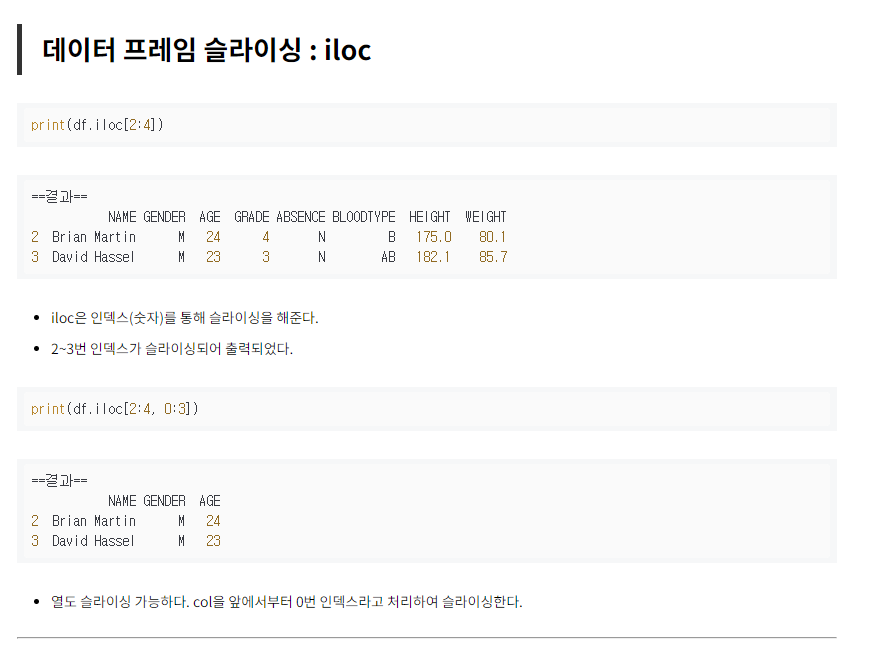

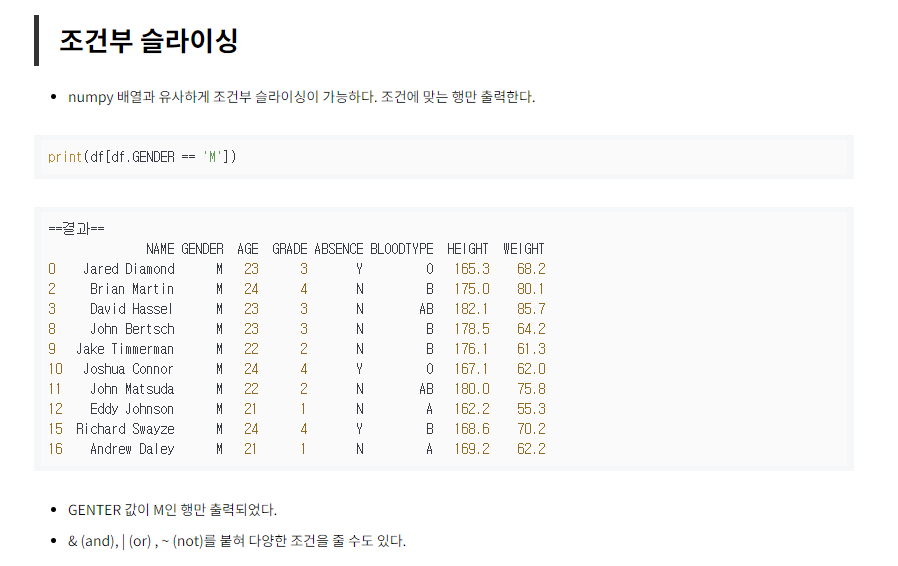

# 60171100 윤민혁
- 타이타닉 데이터

# 데이터셋 로딩

In [2]:
#패키지 불러오기
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz
import math

In [3]:
df = pd.read_csv('data/titanic.csv', index_col=['PassengerId'])
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터 전처리

In [4]:
#필요없는 칼럼 제거
df = df.drop(['Name','Ticket','Cabin','Embarked'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [5]:
#전처리:진위형 변수로 변경
df['Sex'] = df.Sex.map({'female':0,'male':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,NaN,1,2,23.4500


In [6]:
#결측치 확인
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
#중간값으로 결측치 채워주기
df.Age.fillna(df.Age.median(), inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [8]:
#input 변수와 output 변수 구분
X = np.array(df.iloc[:,1:])
y = np.array(df['Survived'])

In [9]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [10]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# 모델적합

In [11]:
# 트레이닝 셋트와 테스트 셋트로 데이터 구분(7:3)
from sklearn.model_selection import train_test_split

#random_state는 반복적으로 같은 결과를 내기 위해 설정
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print('X_train크기:',X_train.shape)
print('y_train크기:', y_train.shape)
print('X_test크기:', X_test.shape)
print('y_test크기:', y_test.shape)

X_train크기: (623, 6)
y_train크기: (623,)
X_test크기: (268, 6)
y_test크기: (268,)


In [12]:
#의사결정나무 모델에 데이터 적합(Fitting)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=3, random_state=0)

# 모델성능평가

In [13]:
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]
실제값
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1

In [14]:
#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz
temp_acc = accuracy_score(y_test, temp_y_pred)
#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출

print('정확도',format(temp_acc))

정확도 0.8432835820895522


In [15]:
#오차행렬(confusion matrix)
print(confusion_matrix(y_test, temp_y_pred))

[[141  27]
 [ 15  85]]


In [16]:
#모델성능
print(classification_report(y_test,(tree.predict(X_test)>0.5).astype('int16')))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       168
           1       0.76      0.85      0.80       100

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.84       268
weighted avg       0.85      0.84      0.84       268



# 6주차 과제
- 60171100 윤민혁

In [17]:
train_scores, test_scores = list(), list()
#Train_score와 test_score의 정확도를 저장하는 장소
#Train_score는 훈련데이터에 특화될수록 증가
#Test_score는 테스트데이터에 일반화될수록 증가

In [18]:
#의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth = i)
    DT1.fit(X_train, y_train)
    
    #training dataset 정확도 증가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #Train정확도와 Test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' %(i,train_acc, test_acc))

>1, train: 0.787, test: 0.787
>2, train: 0.791, test: 0.787
>3, train: 0.836, test: 0.821
>4, train: 0.844, test: 0.821
>5, train: 0.859, test: 0.813
>6, train: 0.872, test: 0.795
>7, train: 0.881, test: 0.802
>8, train: 0.905, test: 0.806
>9, train: 0.925, test: 0.810
>10, train: 0.941, test: 0.817
>11, train: 0.958, test: 0.802
>12, train: 0.968, test: 0.821
>13, train: 0.973, test: 0.806
>14, train: 0.976, test: 0.817
>15, train: 0.978, test: 0.791
>16, train: 0.978, test: 0.784
>17, train: 0.979, test: 0.795
>18, train: 0.979, test: 0.795
>19, train: 0.979, test: 0.806


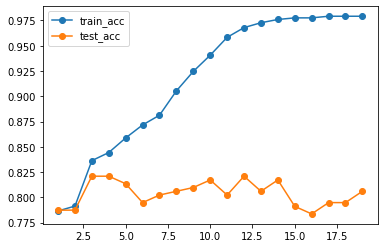

In [19]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label = 'train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label = 'test_acc')
pyplot.legend()
pyplot.show()

#최적의 의사결정나무 깊이는? 3정도 된다.

### 트리 시각화

In [20]:
!pip install pydotplus
!pip install graphviz

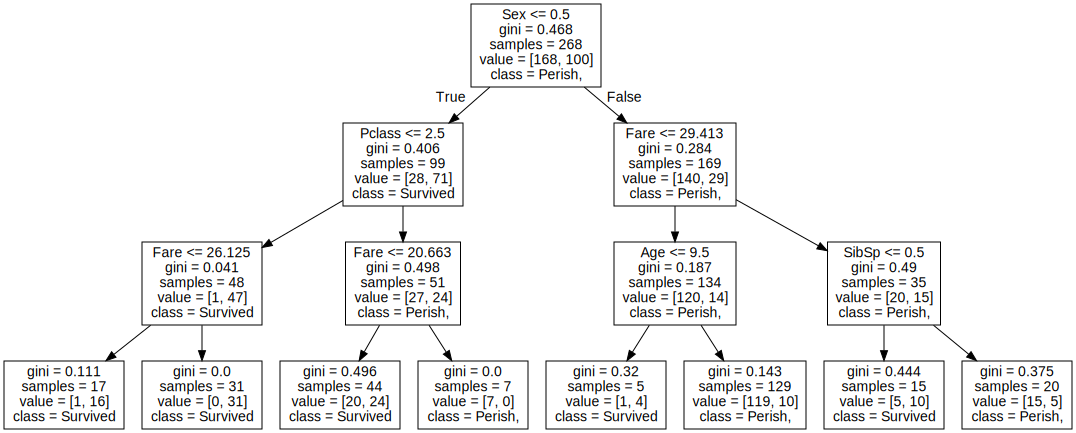

In [21]:
# 트리 시각화
import graphviz
from sklearn.tree import export_graphviz

feature_neme = ['Pclass','Sex','Age','SibSp','Parch','Fare']
tree_graph = export_graphviz(tree, feature_names=feature_neme,
                       class_names=['Perish,','Survived'])
graphviz.Source(tree_graph)

In [22]:
dot = graphviz.Source(tree_graph)
dot.format = 'gif'
dot.render(filename='titanic tree', directory='tree', cleanup=True)

'tree\\titanic tree.gif'

In [23]:
import math

In [24]:
#오차행력(confustion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

[[141  27]
 [ 15  85]]


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy :', accuracy_score(y_test, temp_y_pred))
print('precision:', precision_score(y_test, temp_y_pred))
print('recall:', recall_score(y_test, temp_y_pred))
print('f1:', f1_score(y_test, temp_y_pred))

accuracy : 0.8432835820895522
precision: 0.7589285714285714
recall: 0.85
f1: 0.8018867924528302


In [26]:
#모델 성능
print(classification_report(y_test, temp_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       168
           1       0.76      0.85      0.80       100

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.84       268
weighted avg       0.85      0.84      0.84       268



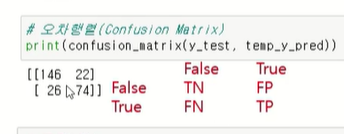

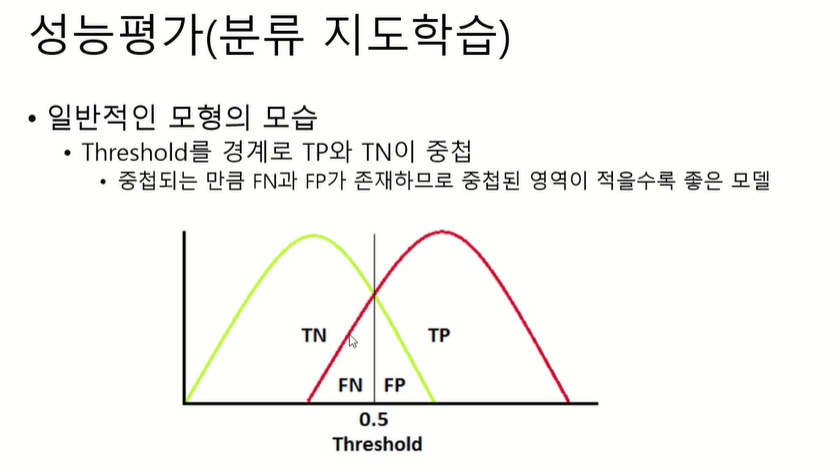

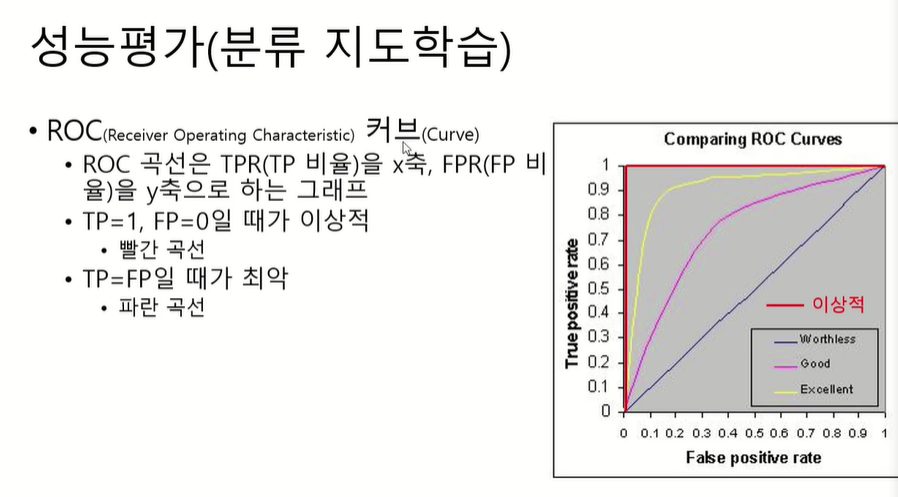

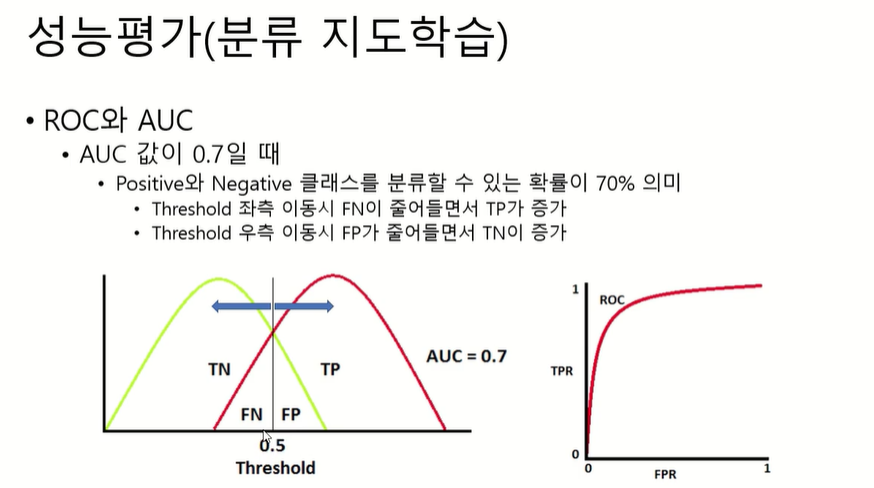

### ROC 와 AUC

In [27]:
tree.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [28]:
tree.predict_proba(X_test)

array([[0.92248062, 0.07751938],
       [0.92248062, 0.07751938],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.45454545, 0.54545455],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.45454545, 0.54545455],
       [0.92248062, 0.07751938],
       [0.05882353, 0.94117647],
       [0.92248062, 0.07751938],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.45454545, 0.54545455],
       [0.92248062, 0.07751938],
       [0.75      , 0.25      ],
       [0.92248062, 0.07751938],
       [0.2       , 0.8       ],
       [0.92248062, 0.07751938],
       [0.        , 1.        ],
       [0.92248062, 0.07751938],
       [0.33333333, 0.66666667],
       [0.45454545, 0.54545455],
       [0.        , 1.        ],
       [0.92248062, 0.07751938],
       [0.45454545, 0.54545455],
       [0.05882353, 0.94117647],
       [1.        , 0.        ],
       [0.

- 첫번쨰 승객은 0일 확률은 0.9~ , 1일 확률은 0.07~

In [29]:
# 0 인 확률(0은 생존을 뜻함)
tree.predict_proba(X_test)[:,0]

array([0.92248062, 0.92248062, 0.2       , 0.        , 0.45454545,
       0.33333333, 0.        , 0.        , 0.75      , 0.45454545,
       0.92248062, 0.05882353, 0.92248062, 0.        , 0.        ,
       0.45454545, 0.92248062, 0.75      , 0.92248062, 0.2       ,
       0.92248062, 0.        , 0.92248062, 0.33333333, 0.45454545,
       0.        , 0.92248062, 0.45454545, 0.05882353, 1.        ,
       0.92248062, 0.05882353, 0.92248062, 0.33333333, 0.92248062,
       0.33333333, 0.92248062, 0.92248062, 0.92248062, 0.92248062,
       0.75      , 0.92248062, 0.92248062, 0.75      , 0.        ,
       0.92248062, 0.92248062, 0.        , 0.92248062, 0.75      ,
       0.33333333, 0.33333333, 0.05882353, 0.92248062, 0.33333333,
       0.75      , 0.92248062, 1.        , 0.92248062, 0.92248062,
       0.92248062, 1.        , 0.        , 0.33333333, 0.45454545,
       0.92248062, 0.05882353, 0.33333333, 0.05882353, 0.        ,
       0.05882353, 0.75      , 0.75      , 0.92248062, 0.92248

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

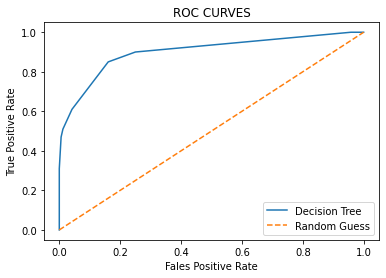

In [31]:
#roc curve 그래프 그리기
plt.plot(fpr, tpr, '-', ms = 2, label = "Decision Tree")
plt.plot([0,1],[0,1],'--', label = "Random Guess")

plt.xlabel('Fales Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc = 'lower right')
plt.show()

In [32]:
#auc 계산
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Cureve : %0.2f' %roc_auc)

Area Under Cureve : 0.90


## random forest

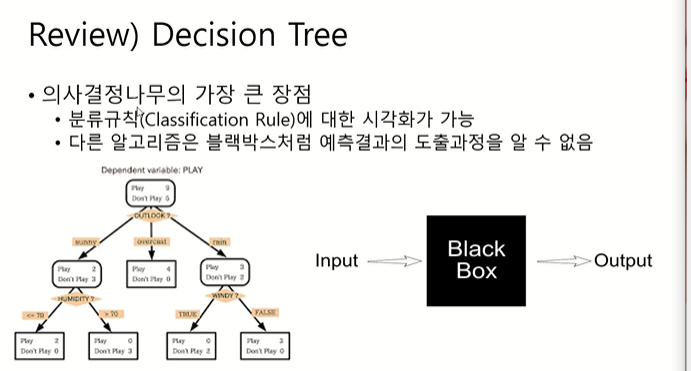

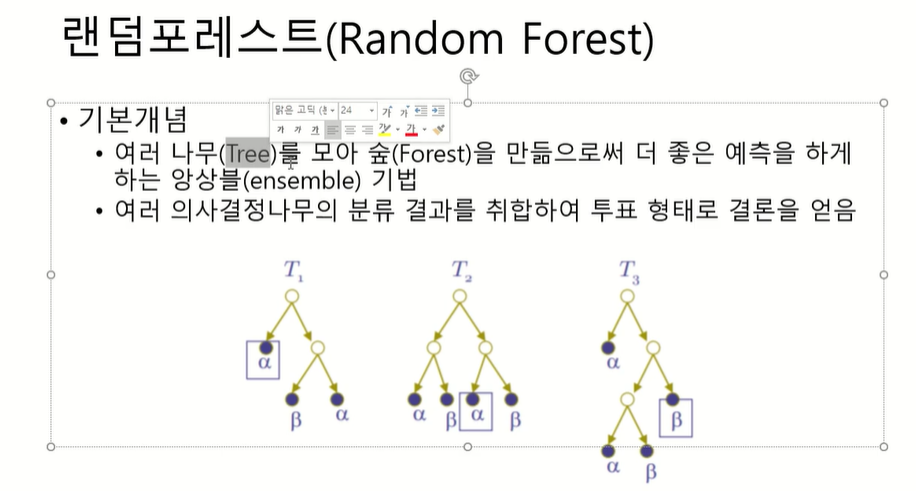

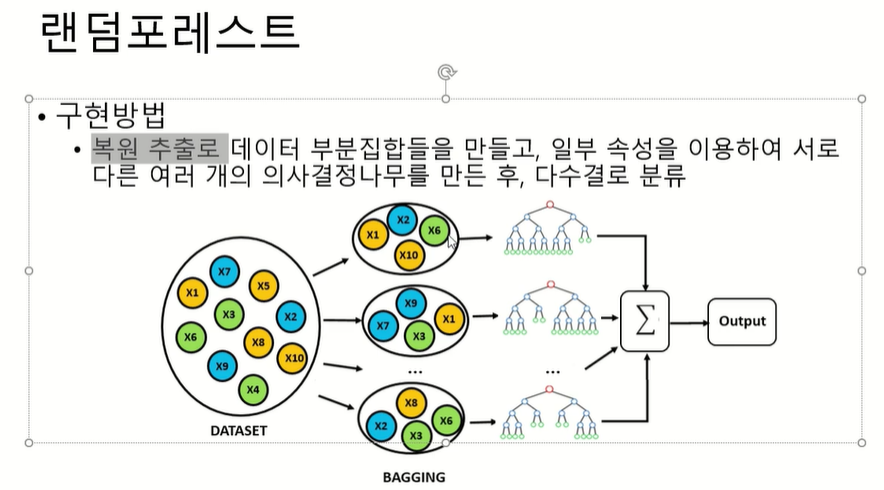

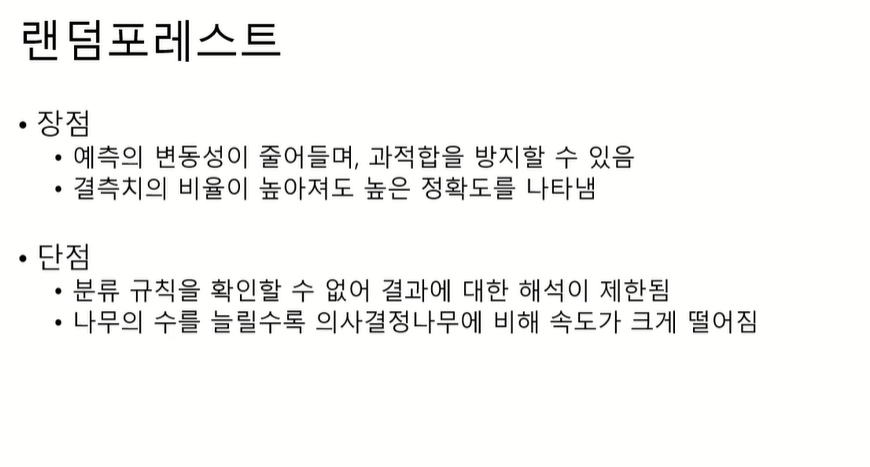

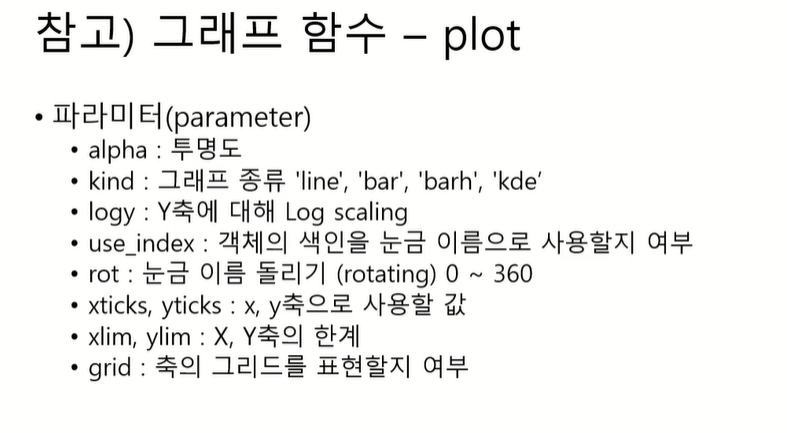

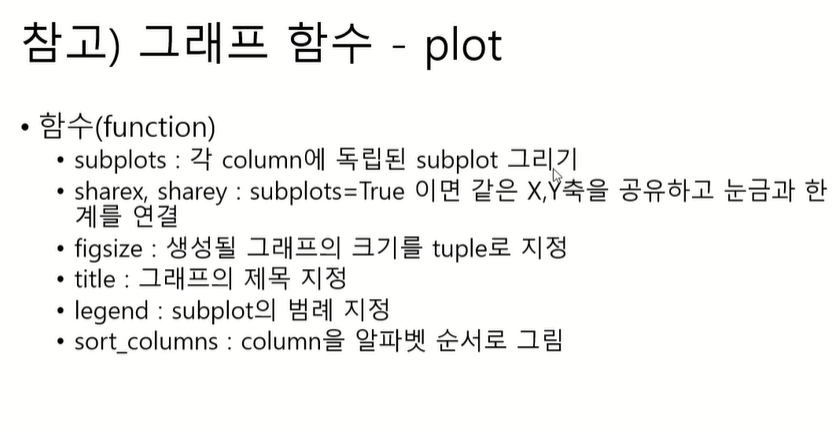

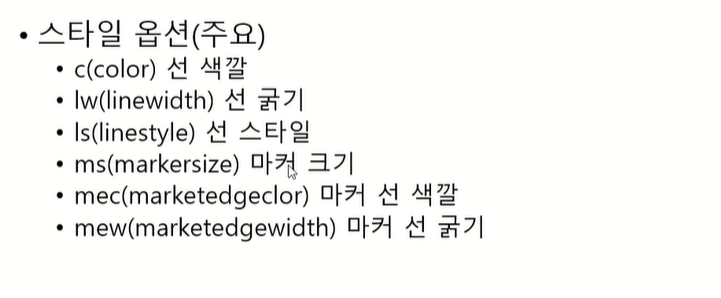

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RF = RandomForestClassifier(n_estimators=100,random_state=0)
# n_estimators는 랜덤 포레스트 갯수

In [35]:
#모델적합
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
temp_y_pred_rf = RF.predict(X_test)
temp_y_pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [48]:
#정확도 계산
temp_acc_rf = accuracy_score(y_test, temp_y_pred_rf)
print(format(temp_acc_rf))

0.8246268656716418


In [38]:
scores = []
for i in range(10,501,5):
    RF = RandomForestClassifier(n_estimators=i,random_state=0)
    RF.fit(X_train,y_train)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc:%0.3f' %(i,acc))

>10, acc:0.802
>15, acc:0.813
>20, acc:0.806
>25, acc:0.813
>30, acc:0.806
>35, acc:0.813
>40, acc:0.806
>45, acc:0.806
>50, acc:0.806
>55, acc:0.799
>60, acc:0.806
>65, acc:0.806
>70, acc:0.810
>75, acc:0.806
>80, acc:0.799
>85, acc:0.799
>90, acc:0.806
>95, acc:0.806
>100, acc:0.810
>105, acc:0.813
>110, acc:0.813
>115, acc:0.813
>120, acc:0.813
>125, acc:0.810
>130, acc:0.817
>135, acc:0.817
>140, acc:0.813
>145, acc:0.817
>150, acc:0.821
>155, acc:0.821
>160, acc:0.821
>165, acc:0.821
>170, acc:0.821
>175, acc:0.821
>180, acc:0.821
>185, acc:0.821
>190, acc:0.821
>195, acc:0.821
>200, acc:0.825
>205, acc:0.821
>210, acc:0.825
>215, acc:0.821
>220, acc:0.821
>225, acc:0.821
>230, acc:0.821
>235, acc:0.825
>240, acc:0.821
>245, acc:0.821
>250, acc:0.817
>255, acc:0.825
>260, acc:0.817
>265, acc:0.817
>270, acc:0.821
>275, acc:0.821
>280, acc:0.821
>285, acc:0.821
>290, acc:0.825
>295, acc:0.821
>300, acc:0.825
>305, acc:0.825
>310, acc:0.828
>315, acc:0.825
>320, acc:0.828
>325, acc:

ValueError: x and y must have same first dimension, but have shapes (98,) and (99,)

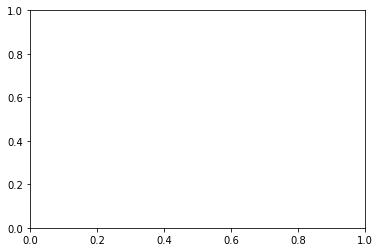

In [39]:
pyplot.plot(range(10,500,5),scores, 'b-', label = 'RF_acc')
pyplot.legend()

In [40]:
#의사결정나무 모델 성능
print('accuracy :', accuracy_score(y_test, temp_y_pred))
print('precision:', precision_score(y_test, temp_y_pred))
print('recall:', recall_score(y_test, temp_y_pred))
print('f1:', f1_score(y_test, temp_y_pred))

accuracy : 0.8432835820895522
precision: 0.7589285714285714
recall: 0.85
f1: 0.8018867924528302


In [41]:
# n_estimators = 300으로 적합
RF = RandomForestClassifier(n_estimators=300, random_state=0)
RF.fit(X_train,y_train)
temp_y_pred_rf = RF.predict(X_test)


In [42]:
print('accuracy :', accuracy_score(y_test, temp_y_pred_rf))
print('precision:', precision_score(y_test, temp_y_pred_rf))
print('recall:', recall_score(y_test, temp_y_pred_rf))
print('f1:', f1_score(y_test, temp_y_pred_rf))

accuracy : 0.8246268656716418
precision: 0.7912087912087912
recall: 0.72
f1: 0.7539267015706805


In [43]:
#roc curve/ auc
from sklearn.metrics import roc_curve
fpr1, tpr1, threshrolds1 = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])


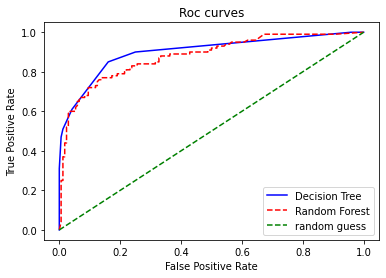

In [44]:
plt.plot(fpr1, tpr1, 'b-',label = 'Decision Tree')
plt.plot(fpr2, tpr2, 'r--', label = 'Random Forest')
plt.plot([0,1],[0,1], 'g--', label = 'random guess')

plt.title('Roc curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [45]:
roc_auc_DT = metrics.auc(fpr1,tpr1)
roc_auc_RF = metrics.auc(fpr2, tpr2)

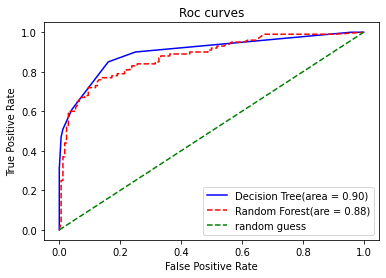

In [46]:
#연혁에 auc값 출력
plt.plot(fpr1, tpr1, 'b-',label = 'Decision Tree(area = %0.2f)'%roc_auc_DT)
plt.plot(fpr2, tpr2, 'r--', label = 'Random Forest(are = %0.2f)' %roc_auc_RF)
plt.plot([0,1],[0,1], 'g--', label = 'random guess')

plt.title('Roc curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()